<a href="https://colab.research.google.com/github/WanjohiWanjohi/AICE_Exercises/blob/week_4/Week_4_Preprocessing_and_Visulization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Week 4 Pandas data preprocessing and visualization
Proprietary material - Under Creative Commons 4.0 licence CC-BY-NC https://creativecommons.org/licenses/by-nc/4.0/legalcode

# Tutorial Overview
Hi everyone! Welcome to the week 4 tutorial - Data processing with Pandas! 

In the lecture, we will go through data processing to prepare data for downstream actions. Visualise our data, get insights and decide whether the feature is giving any information about the target.

* Required Knowledge: Visulaization








#What is data preprocessing?
Data Preprocessing is a technique that is used to convert the raw data into a clean data set.
We collect data from a wide range of sources and most of the time, it is collected in raw format which is not applicable for the analysis.

***Quick fact***:  Research says that data scientists spend around 80% of their time only on preparing the data for processing and 76% of data scientists view data preparation as the least enjoyable part of their work’ ~ Forbes

#Why do we preprocess data?

Most of the time, we don’t get quality data. It often contains missing, noisy and inconsistent values. This can potentially reduce the accuracy of the end result. Therefore, we need to prepare data for processing further and escape from the bottleneck situation.


***quality data!  quality results!***

You can relate data preprocessing to the context of that story. Here, data is our tool, the axe! with which we are going to make our machine learn things/do the analysis to unravel so much of information. You need to clean and prepare that data before using it as a tool and get a surprising outcome.


# Tidying datasets

Another very important dimension of preprocessing is to adjust the format of the dataset, to make sure the data is in an easily readable and processable format. See https://www.jeannicholashould.com/tidy-data-in-python.html for a good example of what dataset tidying is about.



#Getting Started: Preprocessing — Titanic Dataset

Our dataset has information about passengers of the RMS Titanic Ship. RMS Titanic sank in the early morning of 15 April 1912 in the North Atlantic Ocean, four days into the ship’s maiden voyage from Southampton to New York City. It ended as a tragic voyage.


<img src='https://fanart.tv/fanart/movies/597/hdmovieclearart/titanic-54114e0d18b88.png'>

# Inspecting Titanic Dataset


[Titanic Kaggle Competition](https://www.kaggle.com/c/titanic/overview)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Download the dataset files

In [ ]:
!wget -q https://drive.google.com/drive/folders/1gP9ZUJ9x0__Vu4W5MOgaPwnJrsGnqfU0/titanic-train.csv -O train.csv

#### Load the data into DataFrames

In [ ]:
df_train = pd.read_csv("train.csv")

#### Get DataFrame info

Let's check for the basic information about the dataset by running simple commands.

In [ ]:
df_train.shape

(891, 12)

In [ ]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The dataset has 12 columns related to passenger details: 

*   PassengerId: Passenger’s unique ID
*   Survived: Survival status of the passengers (0 = No; 1 = Yes)
*  Pclass: Passenger class (1 = First; 2 = Second; 3 = Third)
*   Name: Passenger’s name
*   Sex: Sex of the Passenger
*   Age: Age of the Passenger
*   SibSp: Number of siblings/spouses aboard
*   ParCh: Number of parents/children aboard
*   Ticket: Ticket number
*   Fare: Passenger fare
*   Cabin: Cabin
*   Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Inspect for null values

It returns a number of null values in each column.

In [ ]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Handle missing values:

there are 3 columns with Null values

# Exercise 

#### Q1 - Imputation
**Imputation for null values in "Age".**   
Hint: One could simply replace it with the mean value or get creative and guess the correct age with the title in the `Name`.

**Imputation for null values in "Cabin".**  

**Imputation for null values in "Embarked"**



https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

## Age

We are going the impute the missing values in the ‘Age’ column by taking the mean value in each group. 
Before that lets see some statistics about Age in the data set.

In [ ]:
df_train[df_train['Survived']==1]['Age'].describe()

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
df_train[df_train['Survived']==0]['Age'].describe()

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

Lets visualise the same information with box plot:

Bottom black horizontal line of blue box plot is minimum value
First black horizontal line of rectangle shape of blue box plot is First quartile or 25%
Second black horizontal line of rectangle shape of blue box plot is Second quartile or 50% or median.
Third black horizontal line of rectangle shape of blue box plot is third quartile or 75%
Top black horizontal line of rectangle shape of blue box plot is maximum value.
Small diamond shape of blue box plot is outlier data or erroneous data.

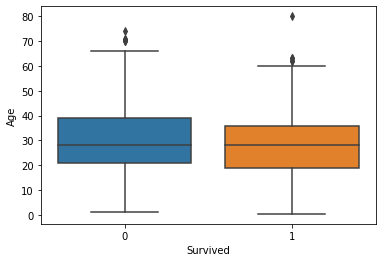

In [ ]:
sns.boxplot(x='Survived',y='Age',data=df_train)

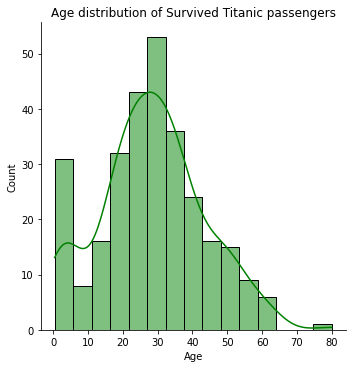

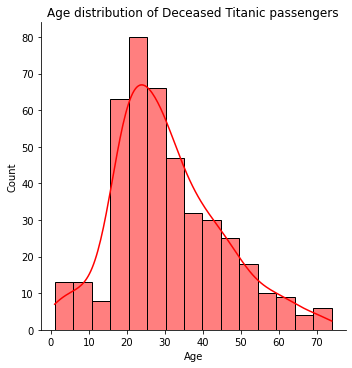

In [ ]:
sns.displot(df_train[df_train['Survived']==1]['Age'].dropna(), bins=15, kde=True, color='green')
plt.title('Age distribution of Survived Titanic passengers');
sns.displot(df_train[df_train['Survived']==0]['Age'].dropna(), bins=15, kde=True, color='red')
plt.ylabel('Count')
plt.title('Age distribution of Deceased Titanic passengers');

### Exercise 

**Imputation for null values in "Age".**   
Hint: One could simply replace it with the mean value or get creative and guess the correct age with the title in the `Name`.


In [ ]:
df_train.Age = df_train.Age.fillna(df_train.Age.mean())

## Cabin

Lets explore the data first.

In [ ]:
df_train['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

Cabin column has 687 missing values, when you see carefully, it has a unique character at the beginning which denotes the deck number. So I have extacted the first charecter. 
Using NaN value as an information for the model. 

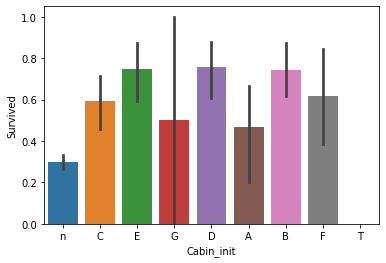

In [ ]:
# Splitting the first letter to get class of the Cabin
df_train['Cabin_init'] = df_train['Cabin'].apply(lambda x : str(x)[0])
sns.barplot(x='Cabin_init', y='Survived', data=df_train);

Fill the columns null with information as 'Not available' and rest as 'available'

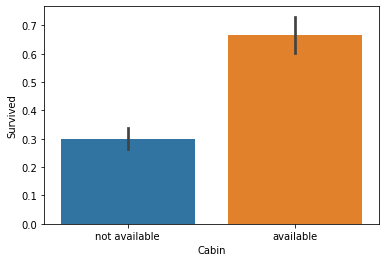

In [ ]:
# Using NaN value as an information for the model.
df_train.loc[df_train.Cabin.notnull(), 'Cabin']='available'
df_train.loc[df_train.Cabin.isnull(), 'Cabin']='not available'
sns.barplot(x='Cabin', y='Survived', data=df_train);

##Embarked
we can simply impute the missing values with most commonly occurred value, which is ‘S’ in this case.

In [ ]:
df_train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
data['Embarked'] = data['Embarked'].fillna('S')

# Encoding categorical features

Many machine learning algorithms support categorical values by converting to numerical values. we are converting few of them here.

Columns which are categorical are  : 

*   Sex 
*   Cabin
*   Embarked
*   Pclass

Initially, we are just going to replace the categorical values into numerical data using replace.


## Sex

Lets see the How many people survived? How many of them are male/female.

In [ ]:
df_train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

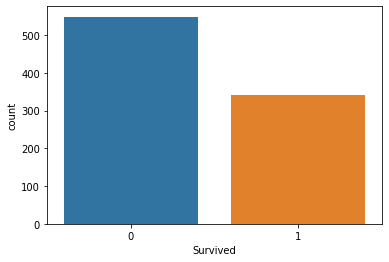

In [ ]:
#Visualize the count of number of survivors
sns.countplot(x='Survived', label="Count", data=df_train);

How many males and females on the ship?

In [ ]:
print('Number of male in this data sample: %d' %df_train[df_train['Sex'] == 'male']['PassengerId'].count())
print('Number of female in this data sample: %d' %df_train[df_train['Sex'] == 'female']['PassengerId'].count())

Number of male in this data sample: 577
Number of female in this data sample: 314


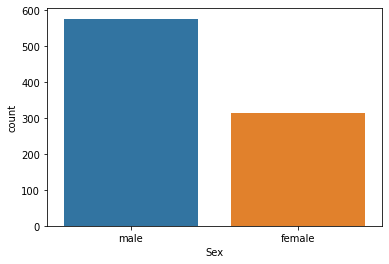

In [ ]:
# Visualize the count of number of female and male 
sns.countplot(x='Sex', data=df_train);

How many males and females survived on the ship?

##Exercise
Count the number of females and males in each survived category

In [ ]:
print(df_train.groupby(['Survived','Sex']).size())

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64


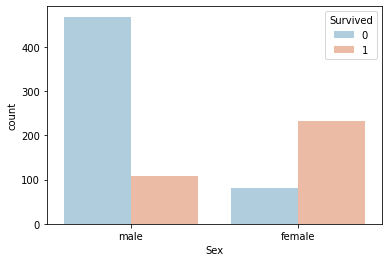

In [ ]:
# Another way to look at the same data.
sns.countplot(x='Sex', hue='Survived', data=df_train, palette='RdBu_r');

Replace male/female to 1/0

In [ ]:
data['Sex'].replace(['male', 'female'], ['1', '0'], inplace=True)

## Embarked

In [ ]:
data['Embarked'] = data['Embarked'].replace(['C', 'Q', 'S'], ['1', '2', '3'])

## Cabin



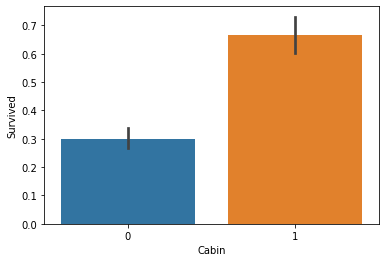

In [ ]:
# Using NaN value as an information for the model.
df_train.loc[df_train.Cabin.notnull(), 'Cabin']=1
df_train.loc[df_train.Cabin.isnull(), 'Cabin']=0
sns.barplot(x='Cabin', y='Survived', data=df_train);

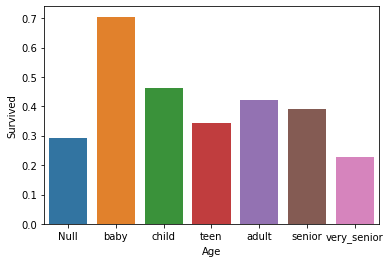

In [ ]:
df_train.Age = pd.cut(df_train.Age, (-1, 0, 5, 15, 25, 40, 60,120),
                        labels=["Null", "baby","child", "teen", "adult", "senior", "very_senior"])

average_age = df_train[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age);

## P class

Were social-economic standing a factor in survival rate? Lets visualise and see

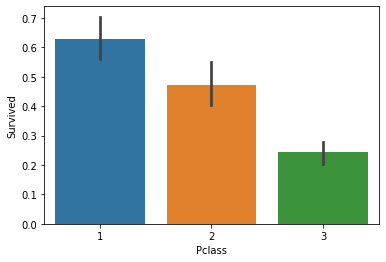

In [ ]:
# Comparing Social class with survival rate
sns.barplot(x='Pclass', y='Survived', data=df_train);

In [ ]:
groupedby_class_survived_size = df_train.groupby(['Pclass','Survived','Sex']).size()
groupedby_class_survived_size

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64

Encoding categorical variables: 


https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/

In [ ]:
## Converting pclass into three separate boolean variables
dummy_pclass = pd.get_dummies(df_train.Pclass, prefix='Pclass')
dummy_pclass.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [ ]:
# Merging these new classes with the main data.
df_train = df_train.merge(dummy_pclass, left_index=True, right_index=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Pclass_1     891 non-null    uint8  
 13  Pclass_2     891 non-null    uint8  
 14  Pclass_3     891 non-null    uint8  
dtypes: float64(2), int64(5), object(5), uint8(3)
memory usage: 86.3+ KB


In [ ]:
groupedby_age_survived_size = df_train.groupby(['Age','Survived']).size()
groupedby_age_survived_size

Age          Survived
Null         0           125
             1            52
baby         0            13
             1            31
child        0            21
             1            18
teen         0           143
             1            75
adult        0           152
             1           111
senior       0            78
             1            50
very_senior  0            17
             1             5
dtype: int64

In [ ]:
print(df_train.groupby(['Age']).size())

Age
Null           177
baby            44
child           39
teen           218
adult          263
senior         128
very_senior     22
dtype: int64


# Create some new features




## Family details : 

we have 2 columns which talks about siblings and parent children information.
SibSp: Number of siblings/spouses aboard
ParCh: Number of parents/children aboard

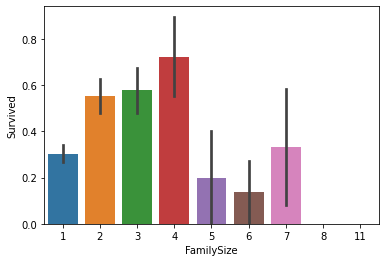

In [ ]:
# Combining Siblings with Parents to get family size? 
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
sns.barplot(x='FamilySize', y='Survived', data=df_train);

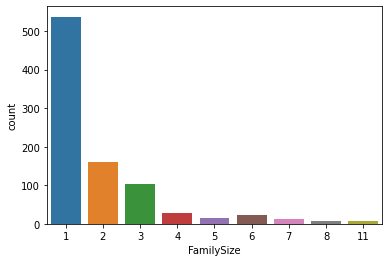

In [ ]:
sns.countplot(x='FamilySize', data=df_train);

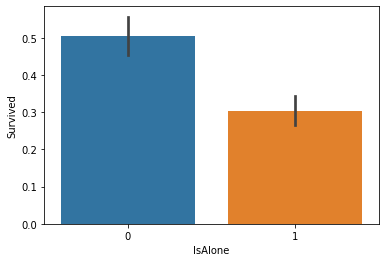

In [ ]:
# The data is so skewed. Why not further modify it as a new column?
# A person without a family has lower chance of survival
df_train['IsAlone'] = 0
df_train.loc[df_train['FamilySize'] == 1, 'IsAlone'] = 1
sns.barplot(x='IsAlone', y='Survived', data=df_train);

In [ ]:
print(df_train.groupby(['IsAlone','Survived']).size())

IsAlone  Survived
0        0           175
         1           179
1        0           374
         1           163
dtype: int64


## Age

Bucketed the age group:

In [ ]:
df_train.Age = pd.cut(df_train.Age, (-1, 0, 5, 15, 25, 40, 60,120),
                        labels=["Null", "baby","child", "teen", "adult", "senior", "very_senior"])

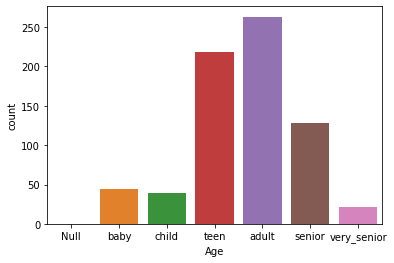

In [ ]:
sns.countplot(x='Age', data=df_train);

In [ ]:
df_train.Age = pd.cut(df_train.Age, (-1, 0, 5, 15, 25, 40, 60,120),
                        labels=[0, 1, 2, 3, 4, 5, 6])

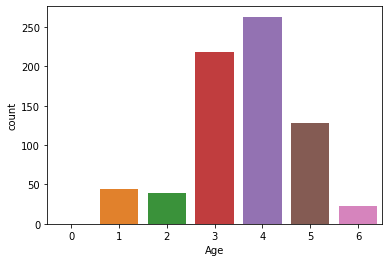

In [ ]:
sns.countplot(x='Age', data=df_train);

## Drop the columns

we are going to drop columns with the least priority. we can drop columns such as ‘PassengerId’ and ‘Ticket’ which ddont have any information about survival/non survival


In [ ]:
df_train.drop(['Ticket','PassengerId'], 1, inplace=True)

Now our data is free from missing values, categorical data, and unwanted columns and ready to be used for further processing.

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
 12  Cabin_init   891 non-null    object 
 13  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB


In [ ]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_init,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,not available,S,n,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,available,C,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,not available,S,n,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,available,S,C,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,not available,S,n,1
